# Clustering

Un clúster es una agrupación de objetos que comparten similitudes, y los objetos que pertenecen a diferentes clústeres presentan diferencias. Encontrar grupos en los datos es el objetivo principal de la agrupación en clústeres. 

> El objetivo es minimizar las diferencias dentro de cada grupo y maximizar las diferencias entre los clústeres.

La agrupación en clústeres consiste en dividir un conjunto de datos finito sin etiquetar en subconuntos de datos diferenciados que emergen de estreucturas subyacentes en los datos.

Sea 

$$
\mathbf{X}= \{\mathbf{x}_1,\mathbf{x}_2,\ldots,\mathbf{x}_i,\ldots,\mathbf{x}_N\}
$$

un conjunto de objetos de entrada donde $\mathbf{x}_i = \left(x_{i1},x_{i2},\ldots,x_{ij},\ldots,x_{id}\right) \in \mathbb{R}^d$, y  $x_{ij}$  es una característica (atributo, dimensión o variable). Una partición $K$ de $\mathbf{X}$, $C = \{C_1,\ldots,C_K\}$ ($K\leq N$) es una partición dura si:


- Cada clúster debe tener al menos un elemento: $C_i\neq \emptyset$, $i=1,\ldots,K$. 
- La unión de todos los clústers es el conjunto de entrada $\mathbf{X}$: $\bigcup_{i=1}^KC_i=\mathbf{X}$. 
- Si un objeto pertenece a un cluster, no puede pertenecer a otro cluster: $C_i\cap C_j = \emptyset$, $i,j=1,\ldots,K$ and $i\neq j$.




## K-means

> El algoritmo k-means es quizás el método de agrupación más utilizado. Después de haber sido estudiado durante varias décadas, sirve como base para muchas técnicas de agrupación más sofisticadas.

### Librerías 

- `scikit-learn-extra`
- `graphviz`
- `numpy`
- `pandas`
- `seaborn`

### Ejemplo 

Veamos un ejemplo de k-means mediante la generación de clústers aleatorios (`make_blobs`) y `k=3`.

**Preámbulo y datos**

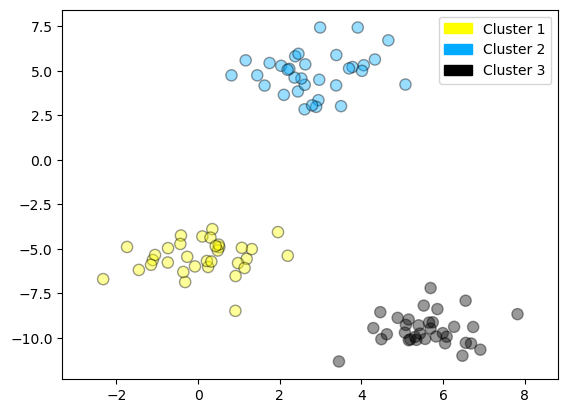

In [10]:
# %matplotlib notebook
# Esta línea permite gráficos interactivos en Jupyter Notebook. Comentada actualmente.

import numpy as np                  # Librería para cálculos numéricos y manejo de arreglos.
import pandas as pd                # Librería para manipulación de datos tipo tabla (DataFrame).
import seaborn as sn               # Librería para visualizaciones estadísticas (no usada aquí).
import matplotlib.pyplot as plt    # Librería para generar gráficos y visualizaciones.

from sklearn.datasets import make_blobs  # Función para generar datos de prueba con clústeres.
from sklearn.cluster import KMeans        # Algoritmo de clustering K-Means.
from shared_utilities import plot_labelled_scatter
# Función personalizada que genera una gráfica de dispersión con etiquetas por clúster.

# Genera un conjunto de datos aleatorio con distribución tipo clúster.
# X: coordenadas de los puntos, y: etiquetas verdaderas (no se usan aquí).
X, y = make_blobs(random_state=10)

# Crea un modelo KMeans que buscará 3 clústeres.
# n_init=3: se hacen 3 inicializaciones distintas para evitar mínimos locales.
kmeans = KMeans(n_init=3, n_clusters=3)

# Ajusta el modelo KMeans a los datos generados.
kmeans.fit(X)

# Grafica los puntos en un scatter plot, usando las etiquetas que asignó KMeans.
# Cada grupo se rotula como 'Cluster 1', 'Cluster 2' o 'Cluster 3'.
plot_labelled_scatter(X, kmeans.labels_, ['Cluster 1', 'Cluster 2', 'Cluster 3'])


**Parámetros de KMeans:**

```
KMeans(
    n_clusters=8,         # Número de clusters (k)
    init='k-means++',     # Método de inicialización (mejor que 'random')
    n_init=10,            # Número de veces que se reinicia con nuevas centroides
    max_iter=300,         # Número máximo de iteraciones por corrida
    tol=1e-4,             # Tolerancia para declarar convergencia
    random_state=None,    # Semilla para reproducibilidad
    algorithm='lloyd'     # Algoritmo: ‘auto’, ‘full’, ‘elkan’, ‘lloyd’
)
```


**Atributos importantes:**

- `kmeans.labels_`: Etiquetas de cluster para cada punto.

- `kmeans.cluster_centers_`: Coordenadas de los centroides finales.

- `kmeans.inertia_`: Suma de los errores cuadráticos (criterio de minimización).


**Algoritmo**

**Entradas:** 
   - Conjunto de patrones en $\mathbb{R}^n$.
   - $k$ número de grupos a formar.

**Salidas:** 

   - Una partición del espacio de patrones, tal que, optimiza la varianza global.

**Inicio:** 

Asignar aleatoreamente un número, del 1 a $K$ a cada observación. Estos funcionan como asignaciones iniciales para las observaciones.

**Repetición**

  1. Para cada uno de los K conglomerados, calcular el centroide del conglomerado. El k-ésimo centroide del grupo es el vector de las $p$ medias de características para las observaciones en el k-ésimo grupo.
  2. Asignar cada observación al conglomerado cuyo centroide es el más cercano (donde más cercano se define utilizando la distancia euclidiana).
  
**Hasta** La última partición obtenida, (idéntica a la de la iteración
anterior ) es la respuesta final del algoritmo.


### Ejemplo: clasificación de frutas
Ejemplo que muestra k-medias para encontrar 4 conglomerados en el conjunto de datos de frutas. Tenga en cuenta que, en general, es importante escalar las características individuales antes de aplicar la agrupación en clústeres de k-medias.

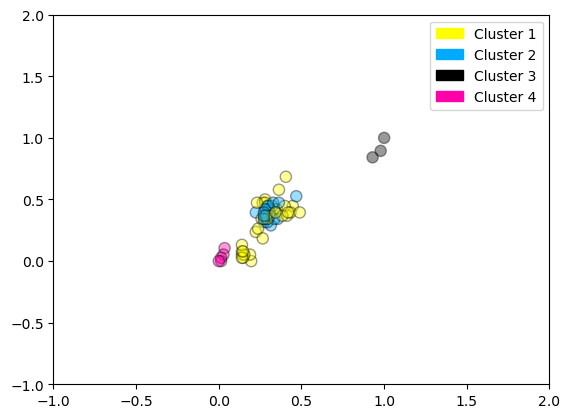

In [11]:
from sklearn.datasets import make_blobs  # (No se usa en este bloque, se podría eliminar si se desea limpiar el código)
from sklearn.cluster import KMeans       # Importa el algoritmo KMeans para clustering no supervisado.
from shared_utilities import plot_labelled_scatter  # Función externa que grafica los datos según sus etiquetas.
from sklearn.preprocessing import MinMaxScaler       # Escalador para normalizar características numéricas.
import pandas as pd                                  # Librería para manipulación de datos tabulares.

# URL del archivo de datos: contiene información de frutas con características físicas y color.
uu = 'https://raw.githubusercontent.com/vmoprojs/DataLectures/refs/heads/master/fruit_data_with_colors.txt'

# Carga los datos en un DataFrame. El archivo es de texto con separador de tabulaciones (\t).
fruits = pd.read_table(uu)

# Selecciona las variables numéricas relevantes para el modelo de clustering y las convierte en matriz NumPy.
X_fruits = fruits[['mass','width','height', 'color_score']].to_numpy()

# Obtiene las etiquetas verdaderas (por tipo de fruta) y las ajusta para comenzar desde 0. No se usan en el clustering.
y_fruits = fruits[['fruit_label']] - 1

# Normaliza los datos a un rango [0, 1] para que todas las variables tengan igual peso en el clustering.
X_fruits_normalized = MinMaxScaler().fit(X_fruits).transform(X_fruits)

# Crea el modelo KMeans para 4 clústeres, con 4 inicializaciones distintas y semilla fija para reproducibilidad.
kmeans = KMeans(n_init=4, random_state=0, n_clusters=4)

# Ajusta el modelo a los datos normalizados. El algoritmo agrupa las observaciones en 4 clústeres.
kmeans.fit(X_fruits_normalized)

# Grafica los resultados, coloreando cada punto según el clúster asignado y con etiquetas personalizadas.
plot_labelled_scatter(X_fruits_normalized, kmeans.labels_,
                      ['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4'])


## K-medoides


**Parámetros de KMedoids:**

```
KMedoids(
    n_clusters=8,             # Número de clusters
    metric='euclidean',       # Distancia: 'euclidean', 'manhattan', etc.
    method='pam',             # Algoritmo: 'pam' (Partitioning Around Medoids) o 'alternate'
    init='heuristic',         # Inicialización: 'heuristic', 'random', 'k-medoids++'
    max_iter=300,             # Máx. número de iteraciones
    random_state=None         # Semilla para reproducibilidad
)

```


**Atributos importantes:**

- `kmedoids.labels_`: Etiquetas de cluster para cada punto.

- `kmedoids.cluster_centers_`: Coordenadas de los medoides (puntos del dataset).

- `kmedoids.inertia_`: Costo total (suma de distancias al medoide más cercano).





**Algoritmo**

**Entradas:** 
   - Conjunto de patrones en $\mathbb{R}^n$.
   - $k$ número de grupos a formar.

**Salidas:** 

   - Una partición del espacio de patrones, tal que, optimiza la varianza global.

**Inicio:** 

Asignar aleatoreamente un número, del 1 a $K$ a cada observación. Estos funcionan como asignaciones iniciales para las observaciones.

**Repetición**

  1. Para cada uno de los K conglomerados, calcular el medoide del conglomerado. El k-ésimo medoide del grupo es el vector de las $p$ medianas de características para las observaciones en el k-ésimo grupo.
  2. Asignar cada observación al conglomerado cuyo medoide es el más cercano (donde más cercano se define utilizando la distancia euclidiana).
  
**Hasta** La última partición obtenida, (idéntica a la de la iteración
anterior ) es la respuesta final del algoritmo.

**Definición matemática de medoide en $\mathbb{R}^n$**

Sea $ X = \{x_1, x_2, \dots, x_N\} \subset \mathbb{R}^n $ un conjunto de puntos, y sea $ C \subseteq X $ un subconjunto correspondiente a un **clúster**.

El **medoide** $ x_m \in C $ es el punto del clúster que **minimiza la suma de distancias** a todos los demás puntos del clúster:

$$
x_m = \arg\min_{x_i \in C} \sum_{x_j \in C} d(x_i, x_j)
$$

donde $ d(\cdot, \cdot) $ es una métrica de distancia, usualmente la **distancia euclidiana**:

$$
d(x_i, x_j) = \|x_i - x_j\|_2 = \sqrt{\sum_{k=1}^n (x_{ik} - x_{jk})^2}
$$


**Importante**

- El medoide **pertenece al conjunto de datos** $ C $.
- Minimiza el **costo total de distancia interna del clúster**.
- Puede utilizar otras métricas como:
  - Manhattan: $ \|x_i - x_j\|_1 $
  - Coseno, Mahalanobis, etc.


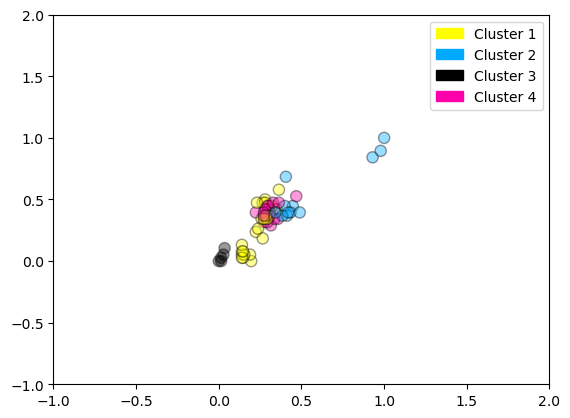

In [29]:
# https://scikit-learn-extra.readthedocs.io/en/latest/index.html
# Documentación oficial del paquete scikit-learn-extra, que amplía scikit-learn con algoritmos adicionales.

from sklearn_extra.cluster import KMedoids
# Importa el algoritmo K-Medoids, una alternativa a KMeans que elige observaciones reales como centroides (medoides).

# Crea el modelo de clustering con K-Medoids para 4 grupos y semilla fija para reproducibilidad.
kmedoides = KMedoids(n_clusters=4, random_state=0)

# Ajusta el modelo a los datos previamente normalizados. Cada punto es asignado al medoide más cercano.
kmedoides.fit(X_fruits_normalized)

# Grafica los resultados del clustering, coloreando los puntos según su grupo asignado por K-Medoids.
# Usa etiquetas personalizadas para los 4 clústeres.
plot_labelled_scatter(X_fruits_normalized, kmedoides.labels_,
                      ['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4'])


In [31]:
# 4. Crear tabla cruzada
tabla_cruzada = pd.crosstab(kmeans.labels_, kmedoides.labels_,
                             rownames=["KMeans"], colnames=["KMedoids"])

print(tabla_cruzada)

KMedoids   0  1  2   3
KMeans                
0         23  9  0   0
1          2  0  0  17
2          0  3  0   0
3          0  0  5   0


## Clustering Jerárquico: Aglomerativo

Una desventaja potencial del agrupamiento K-medias es que requiere que **especifiquemos previamente** el número de agrupamientos K. 

El agrupamiento jerárquico es un enfoque alternativo que **no requiere** que nos comprometamos con una elección particular de K. 

El agrupamiento jerárquico tiene una ventaja adicional sobre el agrupamiento K-medias, ya que da como resultado una atractiva representación basada en árboles de las observaciones, llamada **dendrograma**.

**Algoritmo**

**Entradas:** 
   - Conjunto de patrones en cualquier espacio.

**Salidas:** 

   - Dendograma de agrupamiento

**Inicio:** 

   - Seleccionar una función de comparación entre patrones.
   - Calcular la Matriz Global de Semejanza/Diferencia entre grupos.

   
      

**Repetición**

   1. Identificar la menor diferencia entre grupos y fusionar dichos grupos en un nuevo grupo con etiqueta única.
   2. Actualizar la matriz de sem/dif, eliminando el renglón y columna de los grupos fusionados y agregando un nuevo renglón y columna para el nuevo grupo
   3. Registrar la fusión realizada en el dendrograma
  
**Hasta** Terminar cuando todos los patrones se encuentren agrupados en un solo grupo.


**Parámetros de AgglomerativeClustering:**

```
AgglomerativeClustering(
    n_clusters=2,              # Número de clusters deseado
    affinity='euclidean',      # Métrica de distancia: 'euclidean', 'manhattan', etc. (deprecated, usar metric)
    metric='euclidean',        # Nueva forma recomendada (desde v0.22)
    linkage='ward',            # 'ward', 'complete', 'average', 'single'
    compute_full_tree='auto',  # True para construir el árbol completo
    distance_threshold=None    # Alternativa a n_clusters: especifica un umbral de fusión
)


```



**Atributos importantes**

Después de ajustar el modelo con `.fit()` o `.fit_predict()`, puedes acceder a los siguientes atributos:

| Atributo                   | Descripción                                                                 |
|----------------------------|-----------------------------------------------------------------------------|
| `labels_`                  | Array de etiquetas de clúster asignadas a cada punto                        |
| `n_clusters_`              | Número final de clústeres asignados (puede ser menor si se usa `distance_threshold`) |
| `n_leaves_`                | Número de hojas en el árbol jerárquico (igual al número de muestras)       |
| `n_connected_components_` | Número de componentes conectados (relevante si se usa conectividad explícita) |
| `children_`                | Array con la jerarquía del árbol: cada fila representa una fusión entre dos nodos o clústeres |
| `distances_` (si se usa `compute_distances=True`) | Distancias entre los clústeres fusionados (necesarias para dendrogramas) |

---

En Python, el método [AgglomerativeClustering](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html) nos permite ejecutar clustering jerárquico.

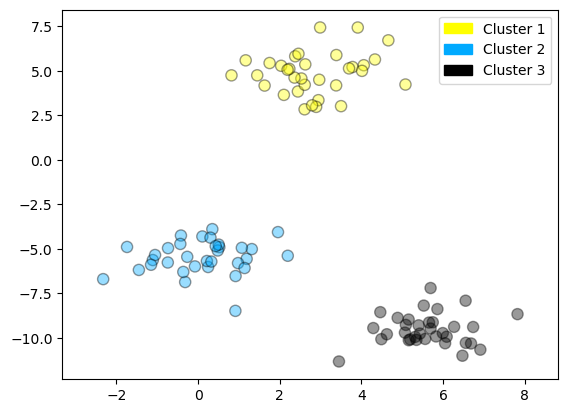

In [13]:
from sklearn.datasets import make_blobs  # Genera datos sintéticos con distribución en forma de clústeres.
from sklearn.cluster import AgglomerativeClustering  # Importa el algoritmo de clustering jerárquico aglomerativo.
from shared_utilities import plot_labelled_scatter  # Función para graficar los datos coloreados por clúster.

# Genera un conjunto de datos de ejemplo con clústeres definidos.
# X contiene las coordenadas de los puntos, y son las etiquetas reales (no se usan en el clustering).
X, y = make_blobs(random_state=10)

# Crea un modelo de agrupamiento jerárquico aglomerativo con 3 clústeres deseados.
cls = AgglomerativeClustering(n_clusters=3)

# Ajusta el modelo a los datos y devuelve las asignaciones de clúster para cada punto.
cls_assignment = cls.fit_predict(X)

# Grafica los datos, coloreando cada punto según el clúster asignado por el modelo.
# Se añaden etiquetas personalizadas para facilitar la interpretación visual.
plot_labelled_scatter(X, cls_assignment, 
                      ['Cluster 1', 'Cluster 2', 'Cluster 3'])


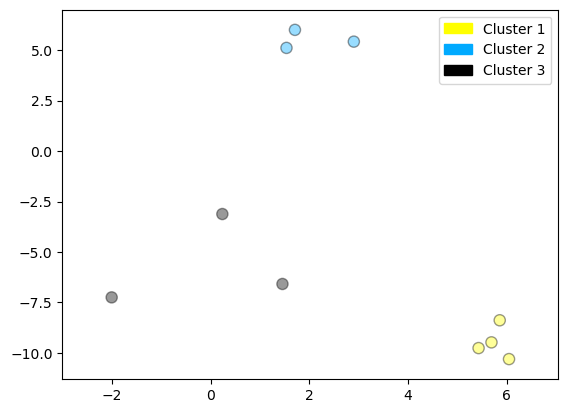

[[  5.69192445  -9.47641249]
 [  1.70789903   6.00435173]
 [  0.23621041  -3.11909976]
 [  2.90159483   5.42121526]
 [  5.85943906  -8.38192364]
 [  6.04774884 -10.30504657]
 [ -2.00758803  -7.24743939]
 [  1.45467725  -6.58387198]
 [  1.53636249   5.11121453]
 [  5.4307043   -9.75956122]]


In [14]:
X, y = make_blobs(random_state = 10, n_samples = 10)
plot_labelled_scatter(X, y, 
        ['Cluster 1', 'Cluster 2', 'Cluster 3'])
print(X)

**Creamos el dendograma**

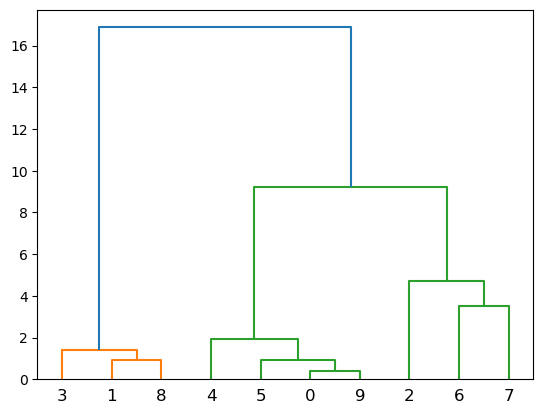

In [15]:
from scipy.cluster.hierarchy import dendrogram,linkage
plt.figure()
dendrogram(linkage(X, 'complete'))
plt.show()

-   Cada hoja del dendrograma representa una de las $n$ observaciones.

-   A medida que subimos por el árbol, algunas hojas comienzan a *fusionarse* en ramas. Estos corresponden a observaciones que son similares entre sí.

-   Cuanto antes (más abajo en el árbol) se produzcan fusiones, más similares serán los grupos de observaciones entre sí. Por otro lado, las observaciones que se fusionan más tarde (cerca de la parte superior del árbol) pueden ser bastante diferentes.


-   La altura de esta fusión, medida en el eje vertical, **indica cuán diferentes son las dos observaciones**. Por lo tanto, las observaciones que se fusionan en la parte inferior del árbol son bastante similares entre sí, mientras que las observaciones que se fusionan cerca de la parte superior del árbol tenderán a ser bastante diferentes.

### Funciones para fusionar grupos

<img src="images/10_fig1.png" width="500" height="300">

-   *Complete*: Disimilitud máxima entre conglomerados. Calcule todas las diferencias por pares entre las observaciones en el grupo $A$ y las observaciones en el grupo $B$, y **registre la mayor de estas diferencias**.

-   *Single*: Disimilitud mínima entre conglomerados. Calcule todas las diferencias por pares entre las observaciones en el grupo $A$ y las observaciones en el grupo $B$, y **registre la más pequeña de estas diferencias**. El enlace único puede dar como resultado conglomerados extendidos y finales en los que las observaciones individuales se fusionan una a la vez.

-   *Average*: Diferencia media entre grupos. Calcule todas las diferencias por pares entre las observaciones en el grupo $A$ y las observaciones en el grupo $B$, y **registre el promedio de estas diferencias**.

-   *Centroid*: Disimilitud entre el centroide para el grupo $A$ (un vector de medias de longitud $p$) y el centroide para el grupo $B$.


En **Python** usamos los métodos:

- [dendrogram](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.dendrogram.html): para elaborar el dendograma.

- [linkage](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html): Realiza agrupamiento jerárquico/aglomerativo.

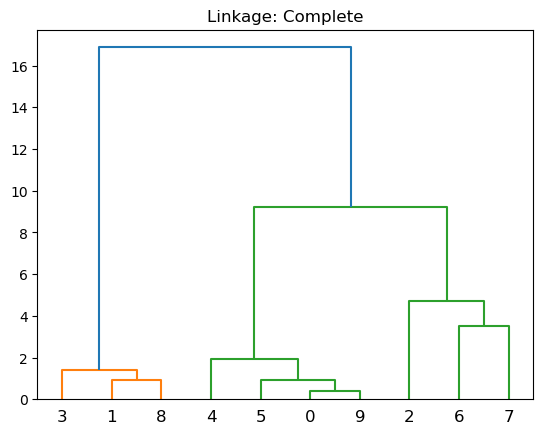

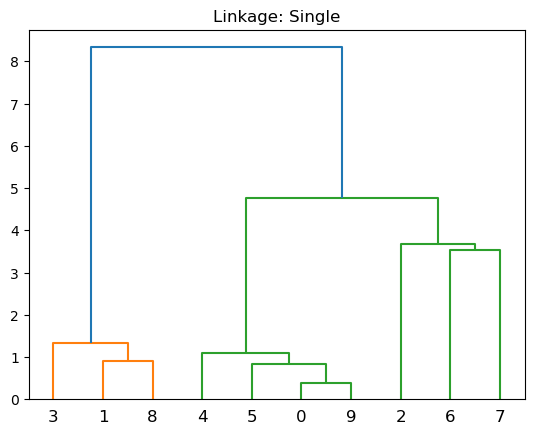

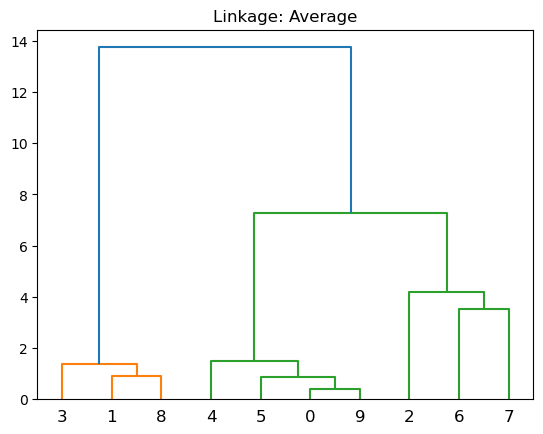

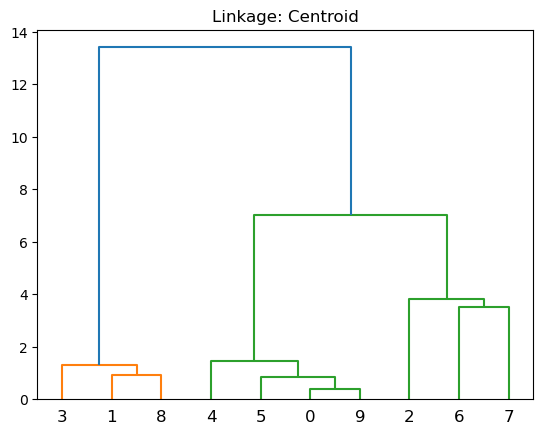

In [16]:
plt.figure()
plt.title('Linkage: Complete')
dendrogram(linkage(X, 'complete'))
plt.show()

plt.figure()
plt.title('Linkage: Single')
dendrogram(linkage(X, 'single'))
plt.show()

plt.figure()
plt.title('Linkage: Average')
dendrogram(linkage(X, 'average'))
plt.show()

plt.figure()
plt.title('Linkage: Centroid')
dendrogram(linkage(X, 'centroid'))
plt.show()

## DBSCAN clustering

Es un algoritmo no supervisado que tienen por objetivo descubrir grupos a partir de formas arbitrarias de cualquier conjunto de datos y al mismo tiempo puede distinguir *noise points* que no forman parte de ningún grupo.

**Parámetros**

- Epsilon ($\epsilon$): define el radio de una *bola*.
- MinPts: Número mínimo de puntos requeridos dentro de la bola de radio $\epsilon$

**Definiciones**:

-  Bola Cerrada: $B_{\epsilon}(p)=B(p;\epsilon)=\{x\in X\mid d(x,p)\leq \epsilon\}$, donde $p$ es el centro y $\epsilon$ es el radio
-  *Core point*: Si, dentro de la bola, contiene un número de puntos mayor o igual a *MinPts*
-  *Border point*: Si, dentro de la bola, contiene al menos un *core point*
-  *Noise point*: Si, dentro de la bola, no contiene ningún *core point*

<img src="images/dbscan.jpg" width="500" height="300">

En Python:

- [`DBSCAN`](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html) es el método para ejecutar el algortimo.

Cluster membership values:
[ 0  1  0  2  0  0  0  2  2 -1  1  2  0  0 -1  0  0  1 -1  1  1  2  2  2
  1]


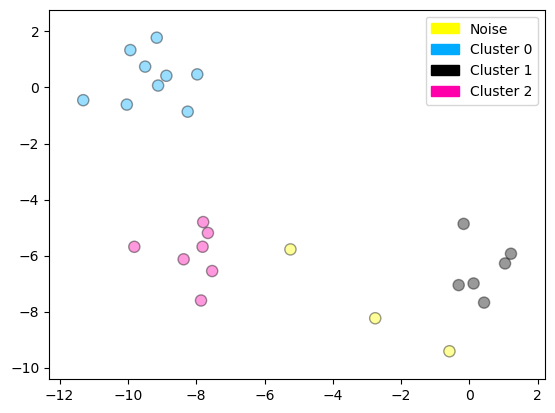

In [19]:
from sklearn.cluster import DBSCAN  # Importa el algoritmo DBSCAN para clustering basado en densidad.
from sklearn.datasets import make_blobs  # Función para generar datos sintéticos agrupados.

# Genera un conjunto de 25 puntos con estructura de clúster para pruebas.
# X: coordenadas de los puntos, y: etiquetas reales (no se usan aquí).
X, y = make_blobs(random_state=9, n_samples=25)

# Crea el modelo DBSCAN con parámetros:
# eps = 2: radio de vecindad considerado para formar un clúster.
# min_samples = 2: número mínimo de puntos para formar un clúster denso.
dbscan = DBSCAN(eps=2, min_samples=2)

# Ajusta el modelo y obtiene las etiquetas de clúster (o -1 si el punto es ruido).
cls = dbscan.fit_predict(X)

# Imprime los valores de pertenencia a clúster de cada punto.
# -1 representa ruido (puntos que no pertenecen a ningún clúster).
print("Cluster membership values:\n{}".format(cls))

# Grafica los resultados del clustering.
# Se le suma 1 a las etiquetas para que el ruido (-1) pase a 0 y así pueda graficarse como "Noise".
# Etiquetas: 'Noise' para los puntos aislados, y 'Cluster 0', 'Cluster 1', etc., para los demás.
plot_labelled_scatter(X, cls + 1, 
                      ['Noise', 'Cluster 0', 'Cluster 1', 'Cluster 2'])


### Ejemplo: clasificación de clientes

In [20]:
uu = "https://raw.githubusercontent.com/vmoprojs/DataLectures/master/Mall_Customers.csv"
datos = pd.read_csv(uu)


dbDat = datos.iloc[:,3:5]
dbDat.describe()

,AnnualIncome,SpendingScore
count,200.000000,200.000000
mean,60.560000,50.200000
std,26.264721,25.823522
min,15.000000,1.000000
25%,41.500000,34.750000
50%,61.500000,50.000000
75%,78.000000,73.000000
max,137.000000,99.000000


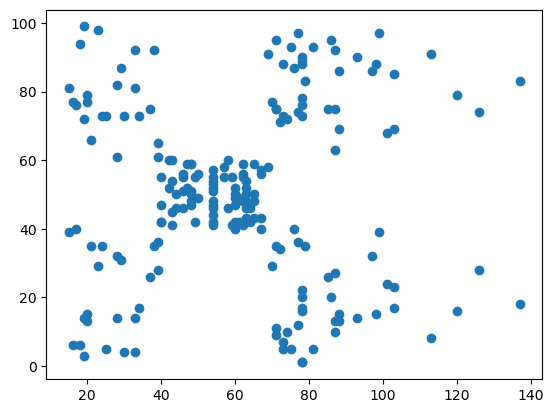

In [21]:
plt.figure()
plt.scatter(dbDat.AnnualIncome,dbDat.SpendingScore)
plt.show()

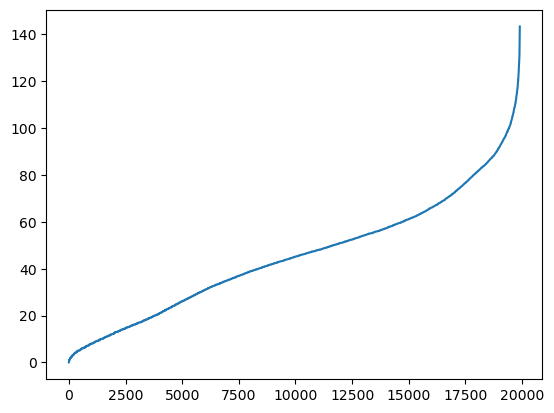

In [22]:
from scipy.spatial import distance_matrix
dd = pd.DataFrame(distance_matrix(dbDat.values, dbDat.values), index=dbDat.index, columns=dbDat.index)
n = len(np.sort(dd.values))
dd = np.sort(dd.values[np.triu_indices(n, k = 1)])

plt.figure()
plt.plot(dd)
plt.show()

Cluster membership values:
[ 0  0  0  0  0  0  0  1  0  0  0  1  0  0  0  0  0  0  0  1  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  2  0  2  0  2  3  2  3  2  0  2  3  2  3  2  3  2  3  2  0  2
  3  2  0  2  3  2  3  2  3  2  3  2  3  2  3  2  0  2  3  2  3  2  3  2
  3  2  3  2  3  2  3  2  3  2  3  2  3  2  3  2  3  2  3 -1  3  2  3 -1
 -1 -1 -1 -1 -1 -1 -1 -1]


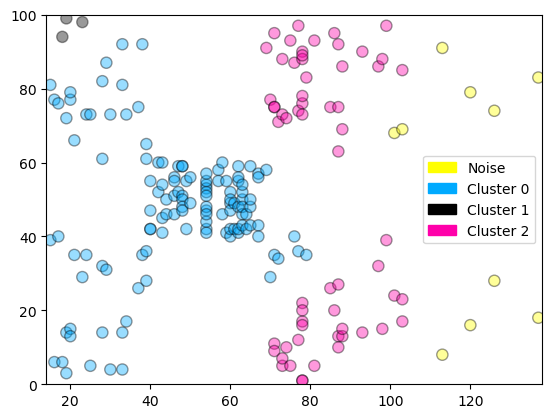

In [23]:
dbscan = DBSCAN(eps = 10, min_samples = 3)

cls = dbscan.fit_predict(dbDat)
print("Cluster membership values:\n{}".format(cls))

plot_labelled_scatter(dbDat.values, cls + 1, 
        ['Noise', 'Cluster 0', 'Cluster 1', 'Cluster 2'])


**Un ejemplo combinado**

In [24]:
www = "https://stat.ethz.ch/Teaching/Datasets/WBL/crime2.dat"
crime = pd.read_csv(www,sep=" ")
crime.describe()

,murder,rape,robbery,assault,burglary,larceny,auto.theft
count,50.000000,50.00000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,7.444000,25.73400,124.092000,211.300000,1291.904000,2671.288000,377.526000
std,3.866769,10.75963,88.348567,100.253049,432.455711,725.908707,193.394418
min,0.900000,9.00000,13.300000,43.800000,446.100000,1239.900000,144.400000
25%,4.225000,18.32500,64.950000,148.850000,1000.075000,2248.900000,245.775000
50%,7.300000,24.10000,106.050000,197.600000,1265.050000,2617.450000,333.850000
75%,10.100000,32.52500,155.850000,282.575000,1529.825000,3007.600000,460.125000
max,15.800000,51.60000,472.600000,485.300000,2453.100000,4467.400000,1140.100000


In [25]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Antes de aplicar ACP, cada variable debe ser centrada y de varianza igual a 1
X_normalized = StandardScaler().fit(crime).transform(crime) 

Varianza explicada: [0.58785136 0.17696026]


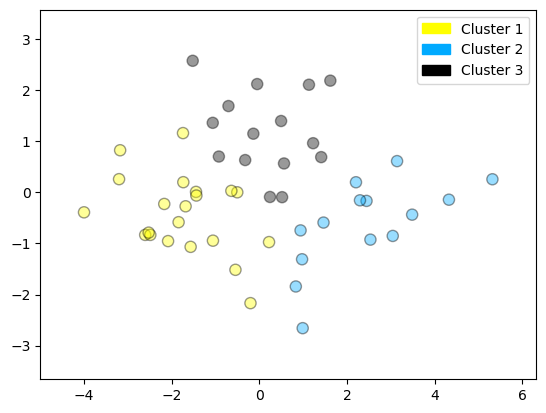

In [27]:
from sklearn.decomposition import PCA  # Importa el algoritmo de reducción de dimensionalidad PCA.
from sklearn.cluster import KMeans     # Importa el algoritmo KMeans para clustering.

# Aplica PCA (Análisis de Componentes Principales) para reducir los datos normalizados a 2 dimensiones.
# Esto permite visualizar mejor los datos y eliminar redundancias entre variables.
pca = PCA(n_components=2).fit(X_normalized)

# Transforma los datos originales normalizados al nuevo espacio de 2 componentes principales.
X_pca = pca.transform(X_normalized)  # Matriz con las dos nuevas variables principales.

# Imprime cuánta varianza explican los dos primeros componentes.
# Esto indica qué porcentaje de la información original se mantiene en la reducción.
print('Varianza explicada:', pca.explained_variance_ratio_)

# Crea el modelo KMeans para 3 clústeres y lo ajusta sobre los datos ya transformados con PCA.
grupos = KMeans(n_clusters=3)
grupos.fit(X_pca)

# Grafica los datos en el espacio reducido (PCA), coloreados según los clústeres asignados por KMeans.
plot_labelled_scatter(X_pca, grupos.labels_, ['Cluster 1', 'Cluster 2', 'Cluster 3'])


[-1  0  1  2]


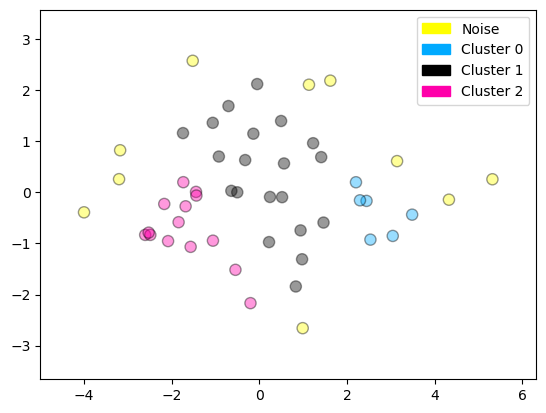

In [28]:
from sklearn.cluster import DBSCAN  # Importa el algoritmo DBSCAN (clustering basado en densidad).
import numpy as np                  # Importa NumPy para manipulación de arrays.

# Crea el modelo DBSCAN con parámetros ajustados:
# eps = 0.8: radio de vecindad para considerar puntos como vecinos.
# min_samples = 3: mínimo número de vecinos (incluyéndose) para que un punto sea considerado núcleo de un clúster.
dbscan = DBSCAN(eps=0.8, min_samples=3)

# Ajusta el modelo sobre los datos reducidos a 2D con PCA.
# Devuelve etiquetas de clúster para cada punto, donde -1 indica puntos ruidosos (no agrupados).
cls = dbscan.fit_predict(X_pca)

# Imprime las etiquetas únicas asignadas por DBSCAN (por ejemplo: [-1, 0, 1] si hay ruido y dos clústeres).
print(np.unique(cls))

# Grafica los puntos en el espacio reducido (PCA), sumando 1 a las etiquetas para que el ruido (-1) pase a 0.
# Esto permite graficar correctamente el ruido con la etiqueta 'Noise', y los demás como 'Cluster 0', 'Cluster 1', etc.
plot_labelled_scatter(X_pca, cls + 1,
                      ['Noise', 'Cluster 0', 'Cluster 1', 'Cluster 2'])
